In [1]:
import numpy as np
from npy_append_array import NpyAppendArray
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.5)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 25
from tqdm import tqdm

In [2]:
# Read in the data from the text file
PATH_hadrons_monash = "/home/tonym/Code/pythia8311/examples/generated_data/pgun_qqbar_hadrons_a_0.68_b_0.98.dat"
PATH_hadrons_target = "/home/tonym/Code/pythia8311/examples/generated_data/pgun_qqbar_hadrons_a_0.6_b_0.9.dat"
PATH_weights = "/home/tonym/Code/pythia8311/examples/generated_data/pgun_qqbar_weights_a_0.68_0.6_b_0.98_0.9.dat"

### Converting hadron four-momentum data

In [3]:
with open (PATH_hadrons_monash, 'r') as f:
    lines = f.readlines()
#with open (PATH_hadrons_target, 'r') as f:
#    lines = f.readlines()

In [4]:
# Initialize dummy counters
counter = 0
event_counter = 0

# Initialize padding parameters
npad_event = 35

# Desired number of events
n_events = 1e5

# Output path
filename_monash = '/home/tonym/Code/tuning_data/parameter_exploration/pgun_qqbar_hadrons_a_0.68_b_0.98_sigma_0.335_N_1e5.npy'
#filename_island = '/home/tonym/Code/tuning_data/pgun_qqbar_hadrons_a_1.5_b_0.6_sigma_0.335_N_1e5.npy'

with tqdm(total = len(lines)) as pbar:
    for line in lines:
        # Events are separated at the new line delimiter
        if line != '\n':
            if counter == 0:
                # Zero-pad the accept-reject array and create array
                arz_i = np.array([np.array(line.split(), dtype = float)])
                counter += 1
            else:
                # Zero-pad the accept-reject array and append
                arz_i = np.append(arz_i, np.array([np.array(line.split(), dtype = float)]), axis = 0)
        else:
            # Zero-pad on the event dimension and create event array
            arz_i = np.pad(arz_i, ((0, npad_event - len(arz_i)),(0,0)))

            with NpyAppendArray(filename_monash) as datafile:
            #with NpyAppendArray(filename_island) as datafile:
            #with NpyAppendArray(filename_monash_prime) as datafile:
                datafile.append(np.array([arz_i]))
            
            counter = 0
            event_counter += 1
            if event_counter == n_events: break
        pbar.update(1)

100%|█████████████████████████████████████████████▉| 1708579/1708580 [00:33<00:00, 50326.71it/s]


In [5]:
# Load the hadron data
pgun_hadrons_monash = np.load(filename_monash, mmap_mode="r")
#pgun_hadrons_island = np.load(filename_island, mmap_mode="r")
#pgun_hadrons_monash_prime = np.load(filename_monash_prime, mmap_mode="r")

In [6]:
print(pgun_hadrons_monash.shape)
#print(pgun_hadrons_island.shape)
#print(pgun_hadrons_monash_prime.shape)

(100000, 35, 5)


In [7]:
with open (PATH_hadrons_target, 'r') as f:
    lines = f.readlines()

In [8]:
# Initialize dummy counters
counter = 0
event_counter = 0

# Initialize padding parameters
npad_event = 35

# Desired number of events
n_events = 1e5

# Output path
filename_target = '/home/tonym/Code/tuning_data/parameter_exploration/pgun_qqbar_hadrons_a_0.6_b_0.9_sigma_0.335_N_1e5.npy'

with tqdm(total = len(lines)) as pbar:
    for line in lines:
        # Events are separated at the new line delimiter
        if line != '\n':
            if counter == 0:
                # Zero-pad the accept-reject array and create array
                arz_i = np.array([np.array(line.split(), dtype = float)])
                counter += 1
            else:
                # Zero-pad the accept-reject array and append
                arz_i = np.append(arz_i, np.array([np.array(line.split(), dtype = float)]), axis = 0)
        else:
            # Zero-pad on the event dimension and create event array
            arz_i = np.pad(arz_i, ((0, npad_event - len(arz_i)),(0,0)))

            with NpyAppendArray(filename_target) as datafile:
            #with NpyAppendArray(filename_island) as datafile:
            #with NpyAppendArray(filename_monash_prime) as datafile:
                datafile.append(np.array([arz_i]))
            
            counter = 0
            event_counter += 1
            if event_counter == n_events: break
        pbar.update(1)

100%|█████████████████████████████████████████████▉| 1697192/1697193 [00:40<00:00, 42276.54it/s]


In [9]:
pgun_hadrons_target = np.load(filename_target, mmap_mode="r")

In [10]:
print(pgun_hadrons_target.shape)

(100000, 35, 5)


### Extract the weights

In [11]:
with open (PATH_weights, 'r') as f:
    lines = f.readlines()

In [14]:
print(lines[0:10])

['0.837443\n', '1.04202\n', '1.15876\n', '0.974083\n', '1.05138\n', '0.810152\n', '0.971971\n', '0.891081\n', '0.762795\n', '1.33941\n']


In [19]:
filename_weights = '/home/tonym/Code/tuning_data/parameter_exploration/pgun_qqbar_weights_a_0.68_0.6_b_0.98_0.9_N_1e5.npy'
with tqdm(total = len(lines)) as pbar:
    for line in lines:
        if line != '\n':
            with NpyAppendArray(filename_weights) as datafile:
                #with NpyAppendArray(filename_island) as datafile:
                #with NpyAppendArray(filename_monash_prime) as datafile:
                    datafile.append(np.array([float(line)]))
        pbar.update(1)

100%|█████████████████████████████████████████████████| 100000/100000 [00:15<00:00, 6624.68it/s]


In [20]:
pgun_hadrons_weights = np.load(filename_weights, mmap_mode="r")

In [21]:
print(pgun_hadrons_weights.shape)

(100000,)


In [25]:
# Collect the multiplicity data
mult_monash = np.array([len(pgun_hadrons_monash[i,:][np.abs(pgun_hadrons_monash[i,:,0]) > 0.0]) for i in range(pgun_hadrons_monash.shape[0])])

mult_target = np.array([len(pgun_hadrons_target[i,:][np.abs(pgun_hadrons_target[i,:,0]) > 0.0]) for i in range(pgun_hadrons_target.shape[0])])

In [32]:
# Compute the reweighting metrics
one_minus_mu = 1. - np.sum(pgun_hadrons_weights) / len(pgun_hadrons_weights)
Neff = (np.sum(pgun_hadrons_weights)**2 / np.sum(pgun_hadrons_weights**2)) / len(pgun_hadrons_weights)

In [33]:
print(one_minus_mu)
print(Neff)

0.0005406043400000282
0.9554300372123237


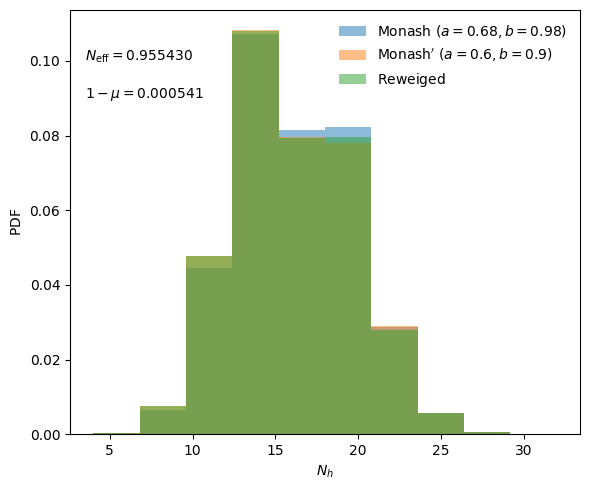

In [43]:
# Histrogram hadron multiplicity
fig, ax = plt.subplots(1,1,figsize=(6,5))
_, bins, _ = ax.hist(mult_monash, alpha = 0.5, density = True, label = r'$\mathrm{Monash}$ $(a = 0.68, b = 0.98)$')
ax.hist(mult_target, bins = bins, alpha = 0.5, density = True, label = r"$\mathrm{Monash'}$ $(a = 0.6, b = 0.9)$")
ax.hist(mult_monash, bins = bins, weights = pgun_hadrons_weights, alpha = 0.5, density = True, label = r'$\mathrm{Reweiged}$')
#ax.hist(mult_island, bins = bins, alpha = 0.5, density = True, label = r"$\mathrm{'Island'}$ $(a = 1.5, b = 0.6)$")
ax.set_xlabel(r'$N_h$')
ax.set_ylabel(r'$\mathrm{PDF}$')
ax.text(3.5, 0.10, rf'$N_{{\mathrm{{eff}}}} = {Neff:3f}$')
ax.text(3.5, 0.09, rf'$1 - \mu = {one_minus_mu:3f}$')
ax.legend(frameon = False)
fig.tight_layout()

### Exploring parameter space metrics

In [2]:
# Path to reweighting metrics
PATH_base_1 = "/home/tonym/Code/pythia8311/examples/weight_metrics_base_a_1.0_b_0.9_n_1e6.dat"

In [3]:
with open (PATH_base_1, 'r') as f:
    lines = f.readlines()

In [59]:
print(lines[0].split('_'))
print(float(lines[0].split('_')[2]))
print(float(lines[0].split('_')[4]))
print(lines[1].split(' '))

['kineVar', 'a', '0.200000', 'b', '0.100000\n']
0.2
0.1
['8.072e-01', '9.546e-02', '3.994e-06\n']


In [4]:
counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b1 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b1 = np.append(metrics_b1, np.array([metrics_i]), axis = 0)
            type_counter = 0

In [5]:
print(metrics_b1.shape)

(81, 5)


In [39]:
a = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
b = np.array([0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
one_minus_mu_b1 = metrics_b1[:,2]
one_minus_mu_b1 = np.reshape(one_minus_mu_b1, (9,9))
one_minus_mu_b1 = np.rot90(np.fliplr(one_minus_mu_b1))
Neff_b1 = metrics_b1[:,4]
Neff_b1 = np.reshape(Neff_b1, (9,9))
Neff_b1 = np.rot90(np.fliplr(Neff_b1))

In [40]:
one_minus_mu_b1 = one_minus_mu_b1[1:]
Neff_b1 = Neff_b1[1:]

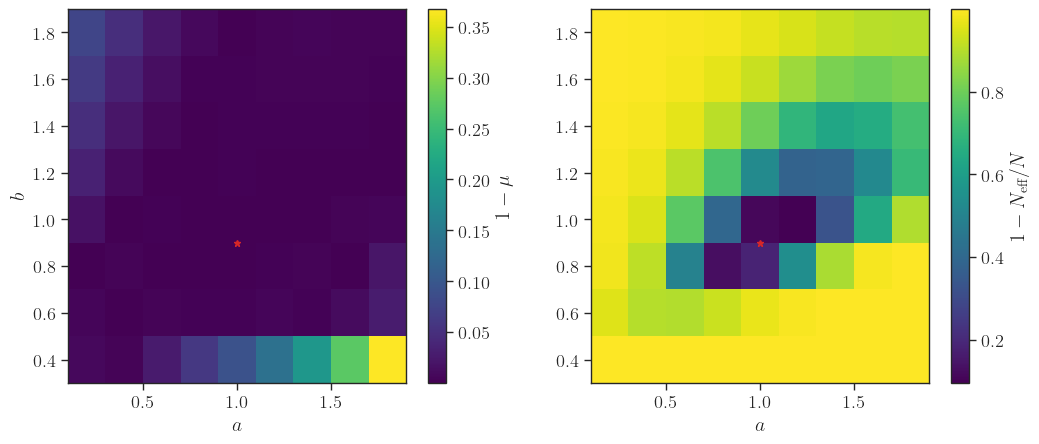

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,5))
mesh1 = ax1.pcolormesh(a, b, one_minus_mu_b1, shading='nearest', cmap = 'viridis')
mesh2 = ax2.pcolormesh(a, b, 1-Neff_b1, shading='nearest', cmap = 'viridis')
ax1.plot(1.0, 0.9, marker = '*', color = 'tab:red')
ax2.plot(1.0, 0.9, marker = '*', color = 'tab:red')
ax1.set_xlabel(r'$a$')
ax1.set_ylabel(r'$b$')
ax2.set_xlabel(r'$a$')
#ax1.set_ylim(0.25, 1.85)
#ax2.set_ylim(0.25, 1.85)
#ax2.set_ylabel(r'$b$')
fig.colorbar(mesh1, ax=ax1, label=r'$1-\mu$')
fig.colorbar(mesh2, ax=ax2, label=r'$1-N_{\mathrm{eff}} / N$')
fig.tight_layout()
fig.savefig(r'reweighting_metrics_a_1.0_b_0.9.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

In [9]:
PATH_base_2 = "/home/tonym/Code/pythia8311/examples/weight_metrics_base_a_0.5_b_1.75_n_1e6.dat"
with open (PATH_base_2, 'r') as f:
    lines = f.readlines()

In [10]:
counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b2 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b2 = np.append(metrics_b2, np.array([metrics_i]), axis = 0)
            type_counter = 0

In [12]:
print(metrics_b2.shape)

(81, 5)


In [13]:
a = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
b = np.array([0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
one_minus_mu_b2 = metrics_b2[:,2]
one_minus_mu_b2 = np.reshape(one_minus_mu_b2, (9,9))
one_minus_mu_b2 = np.rot90(np.fliplr(one_minus_mu_b2))
Neff_b2 = metrics_b2[:,4]
Neff_b2 = np.reshape(Neff_b2, (9,9))
Neff_b2 = np.rot90(np.fliplr(Neff_b2))

In [43]:
one_minus_mu_b2 = one_minus_mu_b2[1:]
Neff_b2 = Neff_b2[1:]

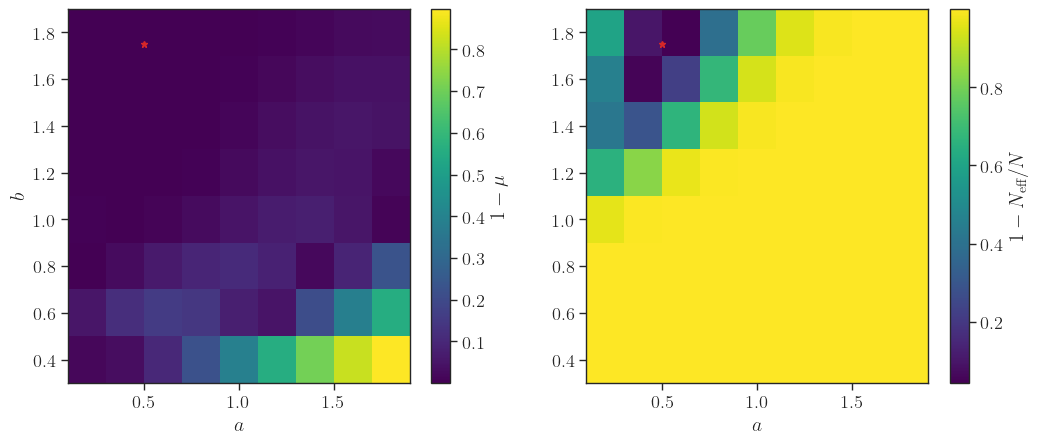

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,5))
mesh1 = ax1.pcolormesh(a, b, one_minus_mu_b2, shading='nearest', cmap = 'viridis')
mesh2 = ax2.pcolormesh(a, b, 1-Neff_b2, shading='nearest', cmap = 'viridis')
ax1.plot(0.5, 1.75, marker = '*', color = 'tab:red')
ax2.plot(0.5, 1.75, marker = '*', color = 'tab:red')
#ax1.set_ylim(0.25, 1.85)
#ax2.set_ylim(0.25, 1.85)
ax1.set_xlabel(r'$a$')
ax1.set_ylabel(r'$b$')
ax2.set_xlabel(r'$a$')
#ax2.set_ylabel(r'$b$')
fig.colorbar(mesh1, ax=ax1, label=r'$1-\mu$')
fig.colorbar(mesh2, ax=ax2, label=r'$1-N_{\mathrm{eff}} / N$')
fig.tight_layout()
fig.savefig(r'reweighting_metrics_a_0.5_b_1.75.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

In [15]:
PATH_base_3 = "/home/tonym/Code/pythia8311/examples/weight_metrics_base_a_1.75_b_0.45_n_1e6.dat"
with open (PATH_base_3, 'r') as f:
    lines = f.readlines()

In [16]:
counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b3 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b3 = np.append(metrics_b3, np.array([metrics_i]), axis = 0)
            type_counter = 0

In [17]:
a = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
b = np.array([0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
one_minus_mu_b3 = metrics_b3[:,2]
one_minus_mu_b3 = np.reshape(one_minus_mu_b3, (9,9))
one_minus_mu_b3 = np.rot90(np.fliplr(one_minus_mu_b3))
Neff_b3 = metrics_b3[:,4]
Neff_b3 = np.reshape(Neff_b3, (9,9))
Neff_b3 = np.rot90(np.fliplr(Neff_b3))

In [46]:
one_minus_mu_b3 = one_minus_mu_b3[1:]
Neff_b3 = Neff_b3[1:]

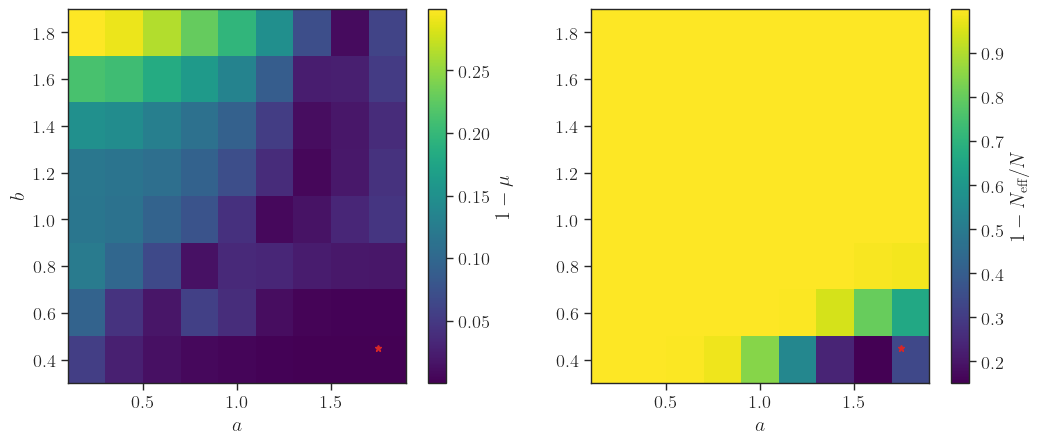

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,5))
mesh1 = ax1.pcolormesh(a, b, one_minus_mu_b3, shading='nearest', cmap = 'viridis')
mesh2 = ax2.pcolormesh(a, b, 1-Neff_b3, shading='nearest', cmap = 'viridis')
ax1.plot(1.75, 0.45, marker = '*', color = 'tab:red')
ax2.plot(1.75, 0.45, marker = '*', color = 'tab:red')
#ax1.set_ylim(0.25, 1.85)
#ax2.set_ylim(0.25, 1.85)
ax1.set_xlabel(r'$a$')
ax1.set_ylabel(r'$b$')
ax2.set_xlabel(r'$a$')
#ax2.set_ylabel(r'$b$')
fig.colorbar(mesh1, ax=ax1, label=r'$1-\mu$')
fig.colorbar(mesh2, ax=ax2, label=r'$1-N_{\mathrm{eff}} / N$')
fig.tight_layout()
fig.savefig(r'reweighting_metrics_a_1.75_b_0.45.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')

In [20]:
PATH_base_4 = "/home/tonym/Code/pythia8311/examples/weight_metrics_base_a_0.5_b_0.45_n_1e6.dat"
with open (PATH_base_4, 'r') as f:
    lines = f.readlines()

In [21]:
counter = 0
type_counter = 0
for line in lines:
    if line != '\n':
        if counter == 0 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 0 and type_counter == 1: 
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b4 = np.array([metrics_i])
            counter += 1
            type_counter = 0
        elif counter == 1 and type_counter == 0:
            metrics_i = np.array([float(line.split('_')[2]), float(line.split('_')[4])])
            type_counter += 1
        elif counter == 1 and type_counter == 1:
            metrics_i = np.append(metrics_i, np.array(line.split(' '), dtype = float))
            metrics_b4 = np.append(metrics_b4, np.array([metrics_i]), axis = 0)
            type_counter = 0

In [36]:
a = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
b = np.array([0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
one_minus_mu_b4 = metrics_b4[:,2]
one_minus_mu_b4 = np.reshape(one_minus_mu_b4, (9,9))
one_minus_mu_b4 = np.rot90(np.fliplr(one_minus_mu_b4))
Neff_b4 = metrics_b4[:,4]
Neff_b4 = np.reshape(Neff_b4, (9,9))
Neff_b4 = np.rot90(np.fliplr(Neff_b4))

In [37]:
print(one_minus_mu_b4)
print(one_minus_mu_b4[0])
one_minus_mu_b4 = one_minus_mu_b4[1:]
Neff_b4 = Neff_b4[1:]

[[7.484e-01 8.549e-01 9.227e-01 9.613e-01 9.816e-01 9.916e-01 9.963e-01
  9.984e-01 9.993e-01]
 [1.039e-04 4.729e-04 8.353e-04 1.436e-03 4.651e-03 1.431e-02 3.485e-02
  7.009e-02 1.222e-01]
 [6.915e-03 8.449e-04 9.023e-06 5.366e-04 1.462e-03 1.884e-03 1.567e-04
  4.337e-03 1.057e-02]
 [2.234e-02 7.366e-03 3.328e-03 1.045e-03 6.079e-04 2.319e-03 3.672e-03
  3.035e-03 1.659e-03]
 [3.453e-02 9.989e-03 4.586e-03 2.034e-04 2.571e-03 3.267e-03 3.453e-03
  3.308e-03 1.675e-03]
 [5.068e-02 1.662e-02 5.079e-03 3.337e-03 1.081e-02 1.282e-02 1.005e-02
  5.765e-03 1.917e-03]
 [6.640e-02 3.406e-02 1.608e-02 1.371e-03 1.306e-02 2.135e-02 2.118e-02
  1.523e-02 7.378e-03]
 [7.494e-02 5.233e-02 3.608e-02 1.808e-02 2.127e-03 1.734e-02 2.310e-02
  2.089e-02 1.436e-02]
 [7.604e-02 6.353e-02 5.469e-02 4.000e-02 1.828e-02 1.837e-03 1.350e-02
  1.653e-02 1.455e-02]]
[0.7484 0.8549 0.9227 0.9613 0.9816 0.9916 0.9963 0.9984 0.9993]


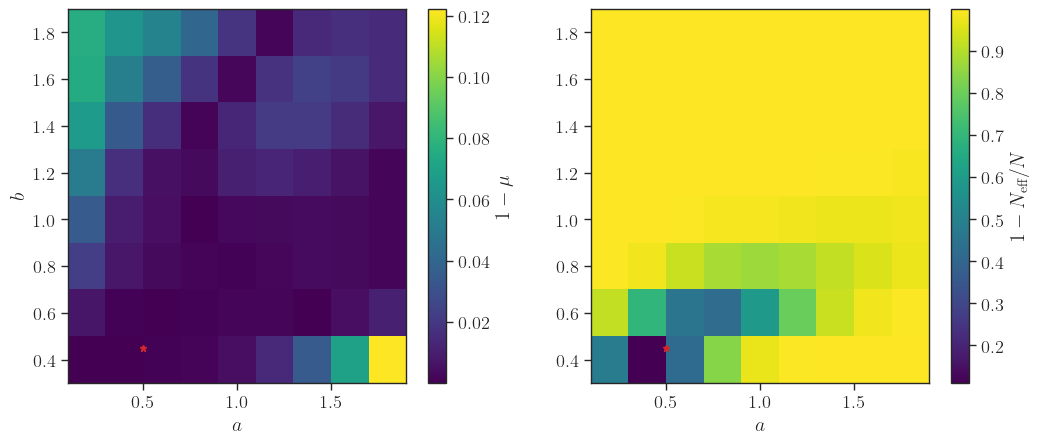

In [51]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(11,5))
mesh1 = ax1.pcolormesh(a, b, one_minus_mu_b4, shading='nearest', cmap = 'viridis')
mesh2 = ax2.pcolormesh(a, b, 1-Neff_b4, shading='nearest', cmap = 'viridis')
ax1.plot(0.5, 0.45, marker = '*', color = 'tab:red')
ax2.plot(0.5, 0.45, marker = '*', color = 'tab:red')
#ax1.set_ylim(0.25, 1.85)
#ax2.set_ylim(0.25, 1.85)
ax1.set_xlabel(r'$a$')
ax1.set_ylabel(r'$b$')
ax2.set_xlabel(r'$a$')
#ax2.set_ylabel(r'$b$')
fig.colorbar(mesh1, ax=ax1, label=r'$1-\mu$')
fig.colorbar(mesh2, ax=ax2, label=r'$1-N_{\mathrm{eff}} / N$')
fig.tight_layout()
fig.savefig(r'reweighting_metrics_a_0.5_b_0.45.pdf', dpi = 300, pad_inches = .1, bbox_inches = 'tight')